<!-- Tags for nbconvert -->


# Introduccion a la Regresion Lineal

## ¿Qué es la regresión lineal?
La regresión lineal es una técnica de análisis de datos que predice el valor de datos desconocidos mediante el uso de otro valor de datos relacionado y conocido. Modela matemáticamente la variable desconocida o dependiente y la variable conocida o independiente como una ecuación lineal. Por ejemplo, supongamos que tiene datos sobre sus gastos e ingresos del año pasado. Las técnicas de regresión lineal analizan estos datos y determinan que tus gastos son la mitad de tus ingresos. Luego calculan un gasto futuro desconocido al reducir a la mitad un ingreso conocido futuro.

## ¿Por qué es importante la regresión lineal?
Los modelos de regresión lineal son relativamente simples y proporcionan una fórmula matemática fácil de interpretar para generar predicciones. La regresión lineal es una técnica estadística establecida y se aplica fácilmente al software y a la computación. Las empresas lo utilizan para convertir datos sin procesar de manera confiable y predecible en inteligencia empresarial y conocimiento práctico. Los científicos de muchos campos, incluidas la biología y las ciencias del comportamiento, ambientales y sociales, utilizan la regresión lineal para realizar análisis de datos preliminares y predecir tendencias futuras. Muchos métodos de ciencia de datos, como el machine learning y la inteligencia artificial, utilizan la regresión lineal para resolver problemas complejos.

## ¿Cómo funciona la regresión lineal?
En esencia, una técnica de regresión lineal simple intenta trazar un gráfico lineal entre dos variables de datos, $x$ e $y$. Como variable independiente, $x$ se traza a lo largo del eje horizontal. Las variables independientes también se denominan variables explicativas o variables predictivas. La variable dependiente, $y$, se traza en el eje vertical. También puede hacer referencia a los valores y como variables de respuesta o variables pronosticadas.

# Modelo de regresion lineal

## Regresion lineal simple
En una regresión lineal, se trata de establecer una relación entre una variable independiente y su correspondiente variable dependiente. Esta relación se expresa como una línea recta. No es posible trazar una línea recta que pase por todos los puntos de un gráfico si estos se encuentran ordenados de manera caótica. Por lo tanto, sólo se determina la ubicación óptima de esta línea mediante una regresión lineal. Algunos puntos seguirán distanciados de la recta, pero esta distancia debe ser mínima. El cálculo de la distancia mínima de la recta a cada punto se denomina función de pérdida.

La ecuación de una línea recta tiene la siguiente forma:
$$
Y = \beta_0 + \beta_1x + \epsilon
$$

Donde:

- $Y$ es la variable independiente.

- $\beta_0$ es el punto de intersección (El valor esperado cuando x = 0).

- $\beta_1$ es la pendiente (El cambio de Y por cada unidad de cambio en x).

- $\epsilon$ (epsilon) es la función de pérdida.



## Regresion lineal multiple
La regresión lineal múltiple encuentra la relación entre dos o más variables independientes y su correspondiente variable dependiente.

La ecuación de regresión lineal múltiple tiene la siguiente forma:
$$
Y = \beta_0 + \sum_{i=1}\beta_ix_i + \epsilon_i
$$
Donde:

- $Y$ es la variable dependiente.
- $x$ es una variable independiente.
- $\beta$ son coeficientes.
- $\epsilon$ (epsilon) es la función de pérdida.


# Implementacion en python

## Librerías necesarias
Utilizaremos la función `ols` de la librería `statsmodels`. Aunque existen otras bibliotecas en Python que también ofrecen modelos de regresión lineal, como `scikit-learn`, hemos optado por `statsmodels` debido a su notación estadística y la mayor explicabilidad que brinda sobre los modelos. Además, `statsmodels` está diseñado para trabajar de manera eficiente con pandas, por lo que también importaremos esta librería.

In [81]:
from statsmodels.formula.api import ols
import pandas as pd

In [82]:
from data.handler import get_heights

heights = get_heights()
heights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   family           934 non-null    object 
 1   father           934 non-null    float64
 2   mother           934 non-null    float64
 3   midparentHeight  934 non-null    float64
 4   children         934 non-null    int64  
 5   childNum         934 non-null    int64  
 6   gender           934 non-null    object 
 7   childHeight      934 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 58.5+ KB


## Notación estadística
En los modelos que presentaremos, utilizaremos notación estadística, la cual es fundamental para comprender y expresar los conceptos detrás de la regresión lineal. Usaremos un ejemplo para comprender el uso de esta.

$$y \sim a + b$$

- $y$ :  Variable dependiente. Es la variable que queremos predecir o explicar con base en otras variables.

- "$\sim$" : Símbolo que indica una relación entre la variable dependiente (a la izquierda) y las variables independientes (a la derecha). En otras palabras, estamos diciendo que $y$ depende de las variables a la derecha del $\sim$.

- $a$ y $b$: Variables independientes, también conocidas como características o predictores. Son las variables que usamos para predecir $y$.

- $+$: Indica que las variables $a$ y $b$ se agregan al modelo de regresión como predictores separados.

En este caso estamos modelando la variable $y$ como una funcion lineal de las variables $a$ y $b$ donde queremos entender cómo cambian los valores de $y$ en función de los valores de $a$ y $b$.


## Modelo OLS
En Python, al usar el modelo de regresión lineal OLS (Ordinary Least Squares), empleamos la notación estadística, pero en lugar de variables abstractas, utilizamos los nombres de las columnas del DataFrame. Esto permite que el modelo sea aplicado directamente a los datos que tenemos en forma de tablas (DataFrames).

In [83]:
# El dataframe heights fue importado previamente
model = ols('childHeight ~ father', data=heights)

# Ajustar modelo
model = model.fit() 

## Visualizacion
Para visualizar la regresión lineal, utilizamos la función `lmplot` de la librería `seaborn`, que es una herramienta poderosa para graficar relaciones lineales entre variables. Esta función no solo traza la línea de regresión, sino que también ofrece una visualización de los datos y puede incluir otras características útiles para el análisis.

<Figure size 500x300 with 0 Axes>

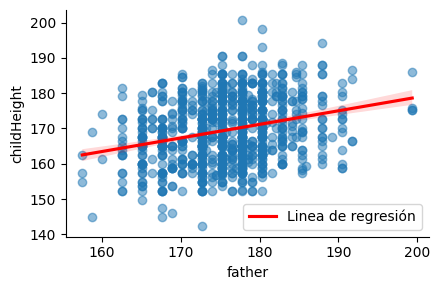

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.lmplot(x='father', y='childHeight', 
           data=heights, 
           line_kws={'color' : 'red', 'label' : 'Linea de regresión'},
           scatter_kws={'alpha' : 0.5},
           height=3, aspect=1.5)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

## Valores atipicos
En el análisis de regresión, se pueden observar puntos que se encuentran considerablemente alejados de la línea de regresión. Estos puntos, conocidos como valores atípicos (outliers), son observaciones que se desvían notablemente de los valores esperados. Los outliers pueden surgir debido a factores externos, errores de medición, o simplemente por aleatoriedad. Su presencia puede influir de manera significativa en la forma y los parámetros de la línea de regresión, afectando la calidad del modelo.

### Distancia de Cook
La Distancia de Cook es una métrica utilizada para identificar observaciones que tienen un impacto desproporcionado en el ajuste del modelo. Evalúa cuánto cambia el modelo global (coeficientes y predicciones) si una observación específica se elimina del análisis. Valores altos en la distancia de Cook indican puntos con una influencia considerable, que deben ser analizados cuidadosamente para determinar si deben ser tratados como outliers o si representan información válida.

Esta metrica puede ser obtenida de nuestro modelo `OLS` a traves del metodo `get_influence()` con el cual obtenemos la clase `OLSInfluence` que contiene la distancia de cook en su atributo `cooks_distance`.

In [85]:
import numpy as np
# Obtener distancia de Cook de OLSInfluence
cooks_distance = model.get_influence().cooks_distance[0]
threshold_cooks = 4 / len(heights)  # Umbral para la distancia de Cook

# Obtener índices de los outliers
outliers = np.where(cooks_distance > threshold_cooks)[0]

### Visualizacion de valores atipicos

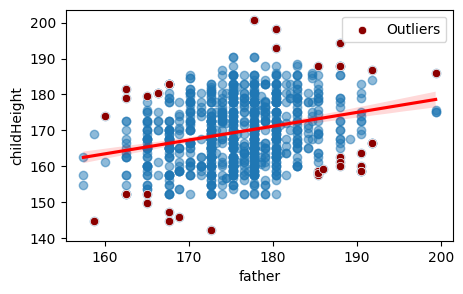

In [ ]:
plt.figure(figsize=(5,3))
sns.regplot(x='father', y='childHeight', data=heights, line_kws={'color' : 'red'}, scatter_kws={'alpha' : 0.5})
sns.scatterplot(x=heights.iloc[outliers]['father'], y=heights.iloc[outliers]['childHeight'], color='darkred', label='Outliers')
plt.show()

## Parametros del modelo OLS
Para poder acceder a los parametros de nuestro modelo utilizamos el atributo `params`

In [87]:
model.params

Intercept    101.953809
father         0.384505
dtype: float64

## Significado de los parametros
En este caso `Intercept` es el equivalente a $\beta_0$ y `father` el equivalente a $\beta_1$, esto seria una regresion lineal simple donde podriamos explicarla de esta manera:

`altura_hijo = intercepto + pendiente * altura_padre`

In [88]:
# Obtener la intersección y la pendiente
intercept, slope = model.params

# Establecemos un valor ejemplo para la altura del padre
altura_padre = 177.8

# Calculamos la altura del hijo
altura_hijo = intercept + slope * altura_padre
altura_hijo

170.31880344853033

Con el metodo `summary()` del modelo `OLS` obtenemos mucha informacion para pruebas estadisticas de la cual nos enfocaremos en una en particular, el coeficiente de determinacion $r^2$


In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     70.99
Date:                Fri, 03 Jan 2025   Prob (F-statistic):           1.35e-16
Time:                        05:12:11   Log-Likelihood:                -3352.1
No. Observations:                 934   AIC:                             6708.
Df Residuals:                     932   BIC:                             6718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.9538      8.026     12.703      0.000      86.202     117.705
father         0.3845      0.046      8.425      0.000       0.295       0.474
==============================================================================
Omnibus:                       29.333   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.852
Skew:                           0.081   Prob(JB):                     0.000596
Kurtosis:                       2.404   Cond. No.                     4.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Coeficiente de determinacion
El coeficiente de determinacion comunmente denotado como $r^2$ es la varianza explicada por el modelo de regresión en relación con la variable dependiente.

- Un valor de $r^2 = 1$ indica que el modelo explica el 100% de la variabilidad de la variable dependiente 
- Un valor de $r^2 = 0$ indica que el modelo no explica ninguna variabilidad de la variable dependiente 

En nuestro modelo OLS este valor puede obtenerse a traves del atributo `rsquared`

In [90]:
print(model.rsquared)

0.07077650419213521


A como podemos ver, en este caso parece ser que la altura del padre explica tan solo un 7% de la varianza en la altura del hijo. Esto podría parecer sorprendente, dado que intuimos que la altura del padre podría ser un factor significativo para predecir la altura del hijo. Este bajo porcentaje de varianza explicada sugiere que hay otros factores no considerados en este modelo que influyen en la altura del hijo. 

## Modelo de regresion lineal multiple
Dado que en nuestro análisis inicial encontramos que la altura del padre explica tan solo un 7% de la varianza en la altura del hijo, decidimos explorar si incluir más variables en el modelo podría ayudarnos a mejorar el ajuste y explicar mejor esta relación.

El dataset de Galton incluye otras variables interesantes, como el genero del hijo. Esta variable podría darnos una perspectiva más completa al considerar la influencia del genero en la altura.

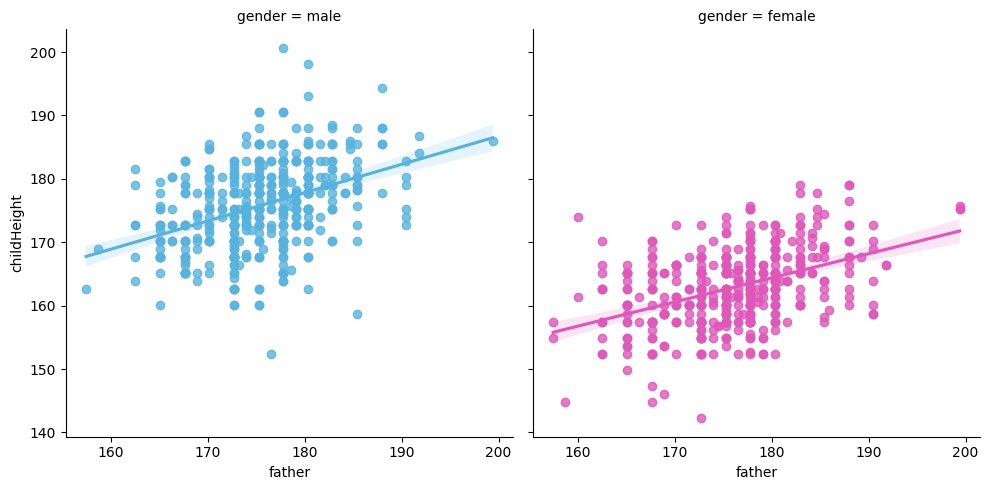

In [91]:
sns.lmplot(x='father', y='childHeight', data=heights, palette=["#57b3de", "#de57b9"], hue="gender", col="gender")
plt.show()

In [92]:
model_gender = ols('childHeight ~ father + gender + 0', data=heights).fit()
print(model_gender.rsquared)

0.5942556553726279
